In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Step 1 - First we will clean the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Milk-Production-forecasting-using-Time-Series-Analysis-ARIMA--master/monthly-milk-production-pounds-p.csv')

In [ ]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [ ]:
df.columns  = ['Month','Milk in pounds for Cow']

In [ ]:
df.tail()

,Month,Milk in pounds for Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [ ]:
df.drop(168,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Milk in pounds for Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Milk in pounds for Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Milk in pounds for Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [ ]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds for Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [ ]:
#Step2 - We will visualize the data now

<Axes: xlabel='Month'>

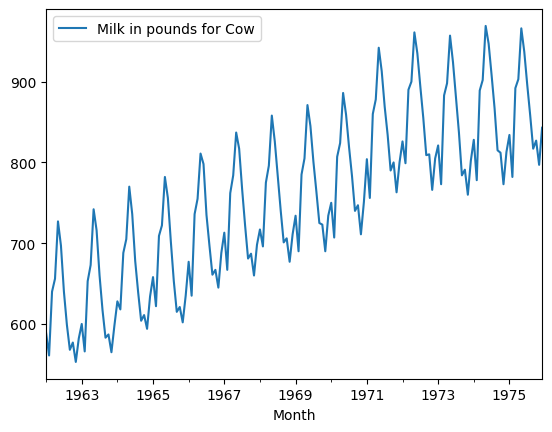

In [ ]:
df.plot()

In [ ]:
time_series = df['Milk in pounds for Cow']

In [ ]:
type(time_series)

pandas.core.series.Series

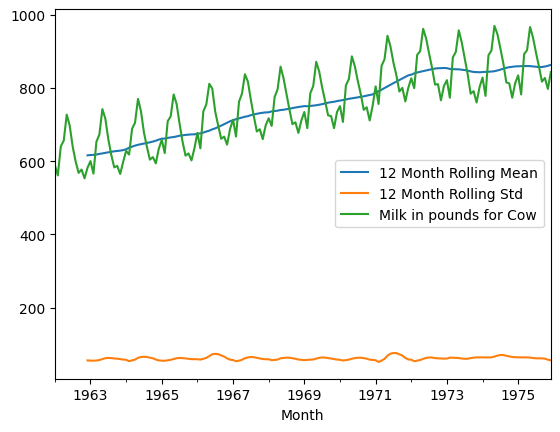

In [ ]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

In [ ]:
# Now let us check the ETS decomposition plot (Trend, Seasonallity and Residual)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomp = seasonal_decompose(time_series)

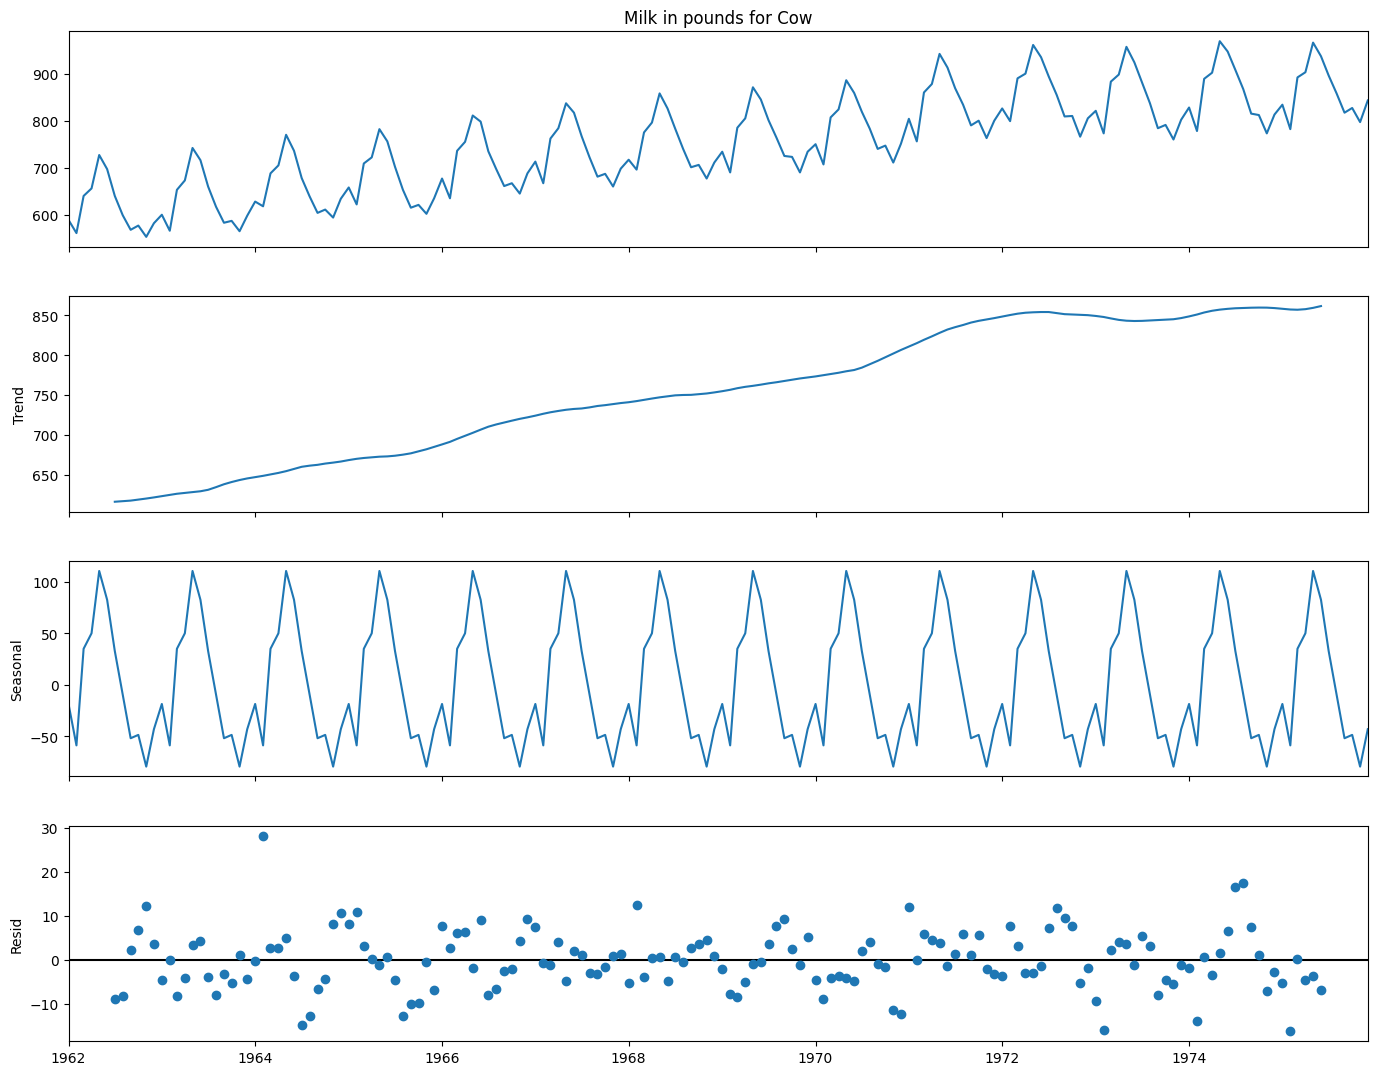

In [ ]:
fig = decomp.plot()
fig.set_size_inches(15,12)

We will do some mathematics now: (Augmented Dickey–Fuller test).
Through this we can check whether the time series is sationary or not. We will check this through the p value.If p value is small, lets say p < 0.5: reject the null hypothesis, which means time series is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['Milk in pounds for Cow'])

In [ ]:
def adf_check(time_series):

    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistics','p-value','# of lags','Num of Observations']

    for value,label in zip(result,labels):
        print(label+ " : "+str(value))

    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_check(df['Milk in pounds for Cow'])

Augmented Dicky-Fuller Test
ADF Test Statistics : -1.3038115874221248
p-value : 0.6274267086030337
# of lags : 13
Num of Observations : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


In [ ]:
df['First Difference'] = df['Milk in pounds for Cow'] - df['Milk in pounds for Cow'].shift(1)

<Axes: xlabel='Month'>

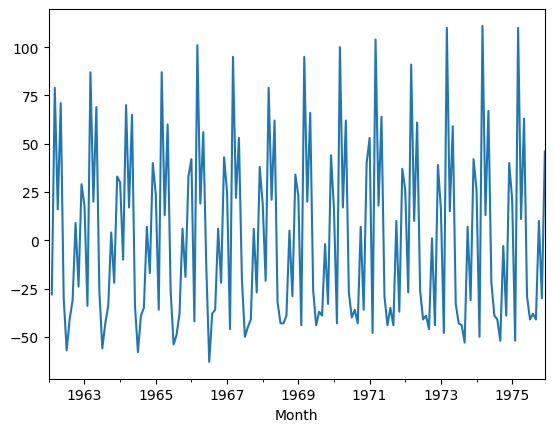

In [ ]:
df['First Difference'].plot()

In [ ]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics : -3.054995558653089
p-value : 0.030068004001784086
# of lags : 14
Num of Observations : 152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [ ]:
#So we successfully made our time series stationary. If this wasn't enough, we would have done a second differencing on this.

In [ ]:
#Seasonal Difference:

In [ ]:
df['Seasonal Difference'] = df['Milk in pounds for Cow'] - df['Milk in pounds for Cow'].shift(12)

<Axes: xlabel='Month'>

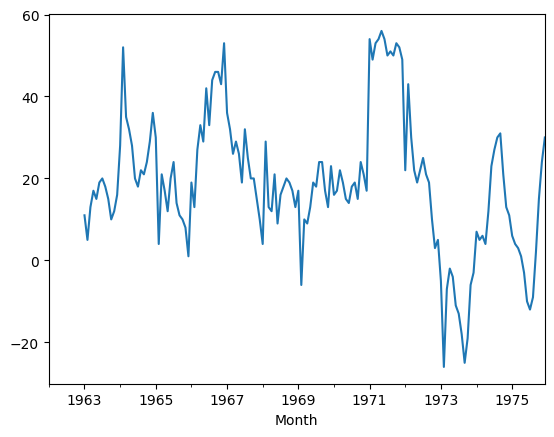

In [ ]:
df['Seasonal Difference'].plot()

In [ ]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics : -2.3354193143594
p-value : 0.16079880527711288
# of lags : 12
Num of Observations : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


**It seems that variance start to increase if we go further in time. In this case we can check for seasonal first difference.**

In [ ]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

<Axes: xlabel='Month'>

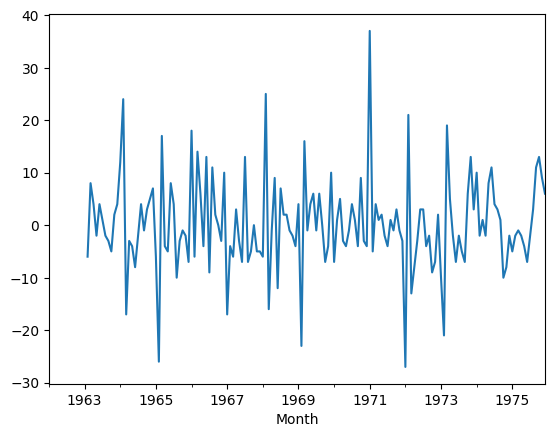

In [ ]:
df['Seasonal First Difference'].plot()

In [ ]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics : -5.038002274921983
p-value : 1.865423431878848e-05
# of lags : 11
Num of Observations : 143
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [ ]:
#Step 4: We will now create ACF and PACF plots.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

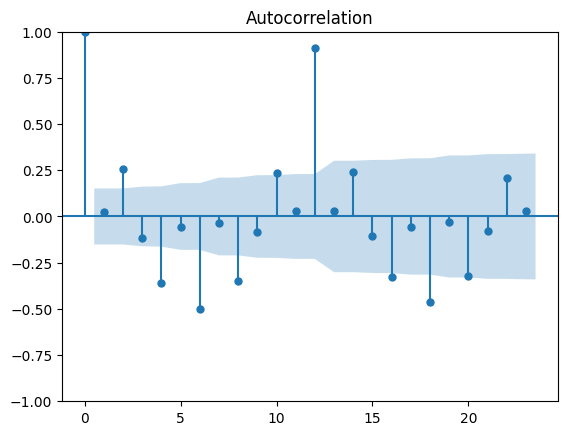

In [ ]:
fig_first = plot_acf(df['First Difference'].dropna())

In [ ]:
#This is an example of gradual decline.

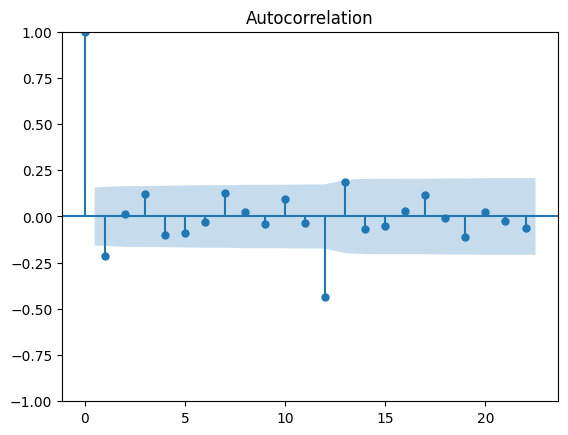

In [ ]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

In [ ]:
#There is a sharp drop off and this is a popular auto correlation plot to see.

In [ ]:
#We can do this using pandas also, but only for acf and not pacf

In [ ]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

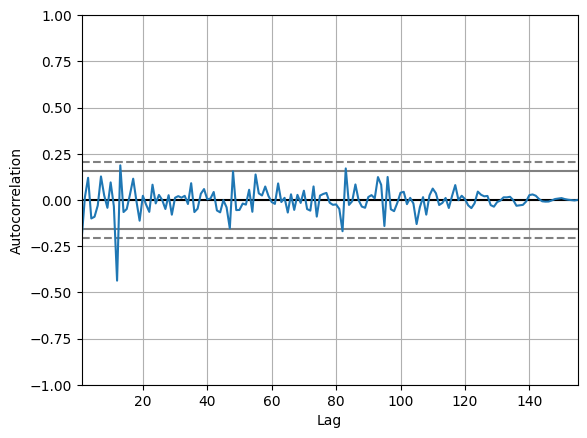

In [ ]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())


If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag.If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using  MA terms.

This will allow us to decide what actual values of p,d and q to provide for our ARIMA model.

p --> # of lag observations<br>
d --> # of times that raw observations are differenced <br>
q --> the size of the moving average window, also called the order of moving average <br>

Now we will plot a pacf. In general, a partial correlation is a conditional correlation.

**It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.**

Typically a sharp drop after lag "k" suggests an AR-k model should be used. If there is a gradual decline, it suggests an MA model.


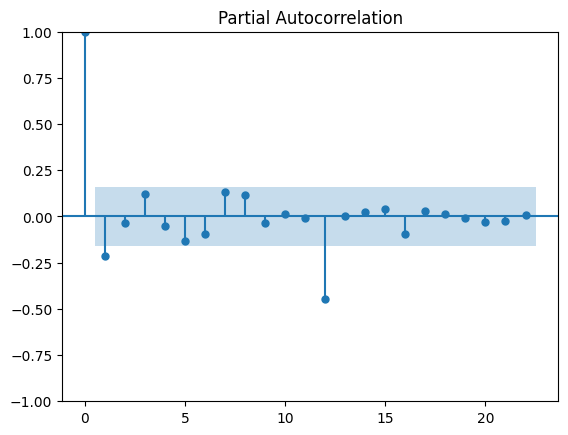

In [ ]:
result = plot_pacf(df['Seasonal First Difference'].dropna())

In [ ]:
#We will create our final acf and pacf plots for referring to our ARIMA model:

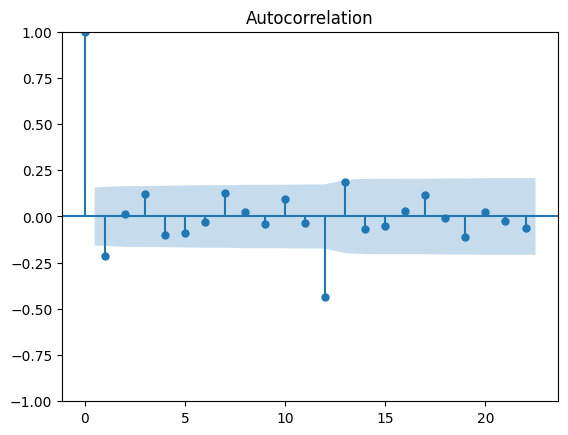

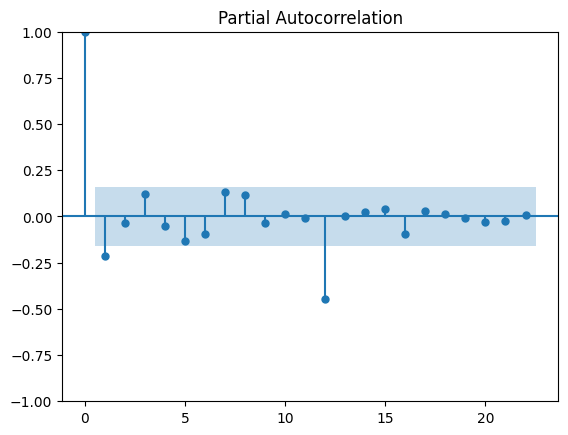

In [ ]:
plot_acf(df['Seasonal First Difference'].dropna());
plot_pacf(df['Seasonal First Difference'].dropna());

In [ ]:
#Step 5: Now since our data is seasonal, we will apply seasonal ARIMA.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(*args, **kwargs)
 |  
 |  ARIMA has been deprecated in favor of the new implementation
 |  
 |  See Also
 |  --------
 |  statsmodels.tsa.arima.model.ARIMA
 |      ARIMA models with a variety of parameter estimators
 |  statsmodels.tsa.statespace.SARIMAX
 |      SARIMAX models estimated using MLE
 |  
 |  Method resolution order:
 |      ARIMA
 |      ARMA
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from ARMA:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds for Cow'],order=(0,1,0),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model.fit()

In [ ]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds for Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Wed, 20 Mar 2024   AIC                           1074.131
Time:                                      08:31:51   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

<Axes: xlabel='Month'>

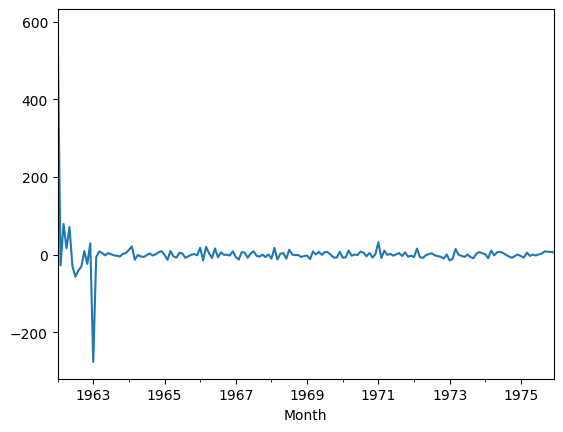

In [ ]:
results.resid.plot()

<Axes: ylabel='Density'>

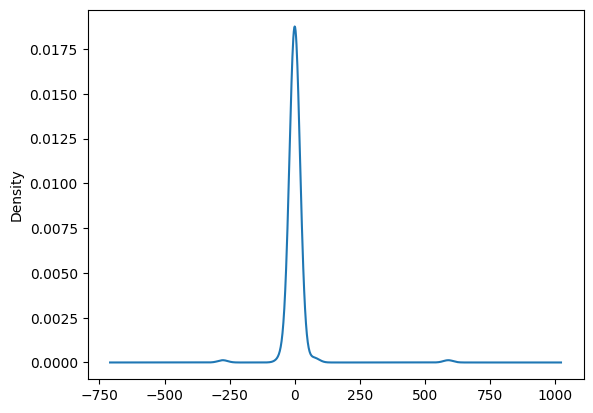

In [ ]:
results.resid.plot(kind='kde')

<Axes: xlabel='Month'>

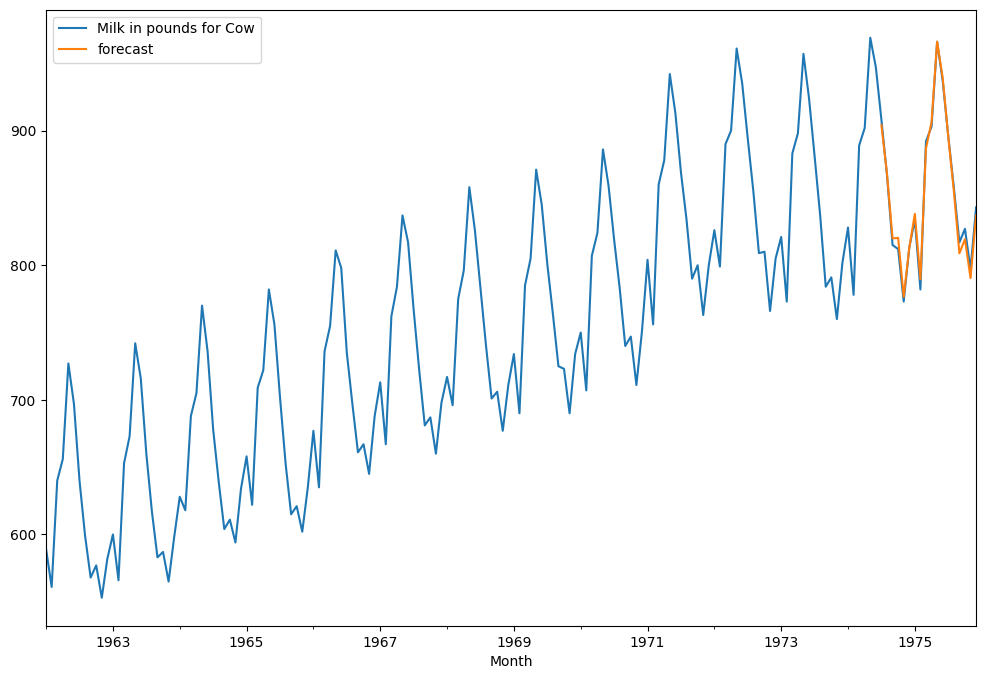

In [ ]:
df['forecast'] = results.predict(start=150, end=168)
df[['Milk in pounds for Cow','forecast']].plot(figsize=(12,8))

In [ ]:
df.tail()

,Milk in pounds for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,
1975-08-01,858.0,-38.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,2.0,11.0,808.841372
1975-10-01,827.0,10.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,30.0,6.0,837.063622


In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [ ]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [ ]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)

In [ ]:
future_df

,Milk in pounds for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_df = pd.concat([df,future_df])

In [ ]:
final_df.tail()

,Milk in pounds for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_df['forecast'] = results.predict(starts=168,end=192)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['starts']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
final_df.tail()

,Milk in pounds for Cow,First Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,951.525867
1977-08-01,NaN,NaN,NaN,NaN,911.918957
1977-09-01,NaN,NaN,NaN,NaN,865.881182
1977-10-01,NaN,NaN,NaN,NaN,871.027295
1977-11-01,NaN,NaN,NaN,NaN,836.962996


<Axes: >

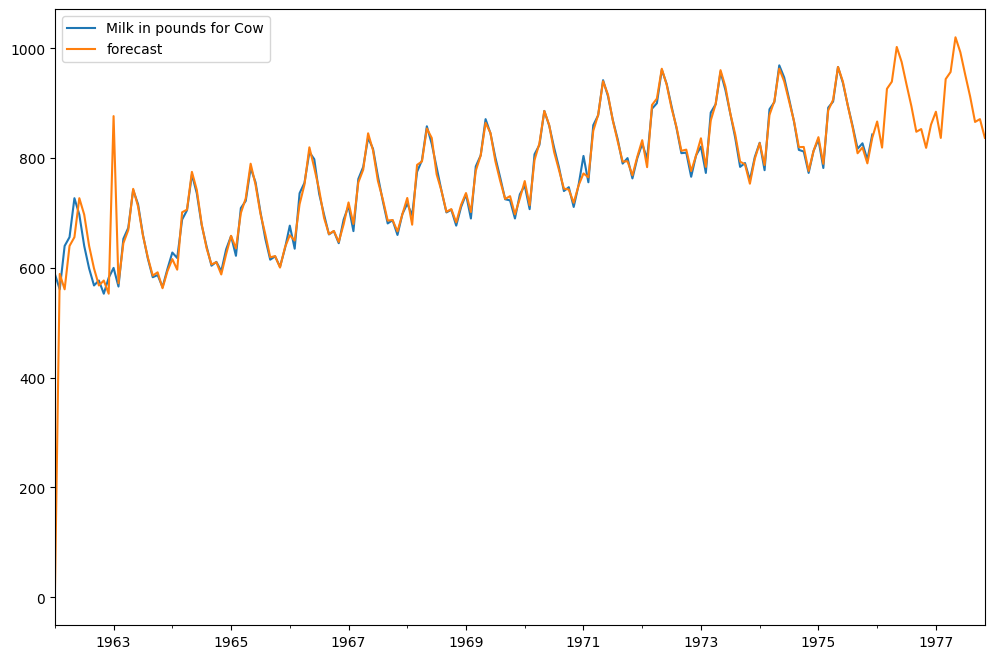

In [ ]:
final_df[['Milk in pounds for Cow','forecast']].plot(figsize=(12,8))

**We have successfully forecasted for next 2 years and seems that it fits in well.**